<a href="https://colab.research.google.com/github/daoudecho/Enter-to-TensorFlow/blob/master/Cell_Images_for_Detecting_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle  # installing kaggel

In [2]:

# upload "keggle.json" file that we download from keggle creat your API 
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [3]:
#!kaggle datasets download -d moltean/fruits -w -f fruits.zip

!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -w -f cell_images.zip

 98% 330M/337M [00:07<00:00, 41.6MB/s]
100% 337M/337M [00:07<00:00, 46.0MB/s]


In [4]:
!ls 

cell_images.zip  sample_data


In [5]:
# Unzip the data
!unzip cell_images.zip

Archive:  cell_images.zip
   creating: cell_images/
   creating: cell_images/Parasitized/
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_171.png  
 extracting: cell_images/Parasitized/C100P61ThinF_IMG_201509

In [6]:
!ls /content/cell_images/

Parasitized  Uninfected


In [7]:
import os
parasitized_data = os.listdir('/content/cell_images/Parasitized/')
print(parasitized_data[:10])

uninfected_data = os.listdir('/content/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])
print(len(parasitized_data))
print(len(uninfected_data))

['C142P103ThinF_IMG_20151005_221931_cell_189.png', 'C175P136NThinF_IMG_20151127_141253_cell_237.png', 'C179P140ThinF_IMG_20151127_153436_cell_181.png', 'C84P45ThinF_IMG_20150818_102800_cell_2.png', 'C117P78ThinF_IMG_20150930_220616_cell_96.png', 'C97P58ThinF_IMG_20150917_151512_cell_177.png', 'C179P140ThinF_IMG_20151127_153436_cell_168.png', 'C156P117ThinF_IMG_20151115_154313_cell_272.png', 'C68P29N_ThinF_IMG_20150819_134712_cell_51.png', 'C180P141NThinF_IMG_20151201_165528_cell_170.png']


['C42P5thin_original_IMG_20150623_134547_cell_155.png', 'C187P148NThinF_IMG_20151203_153713_cell_140.png', 'C175P136NThinF_IMG_20151127_141428_cell_62.png', 'C1_thinF_IMG_20150604_104942_cell_139.png', 'C184P145ThinF_IMG_20151203_103637_cell_136.png', 'C65P26N_ThinF_IMG_20150818_154050_cell_90.png', 'C71P32_ThinF_IMG_20150813_162554_cell_13.png', 'C231ThinF_IMG_20151112_153041_cell_49.png', 'C61P22N_ThinF_IMG_20150818_112518_cell_37.png', 'C209ThinF_IMG_20151029_160927_cell_122.png']
13780
13780


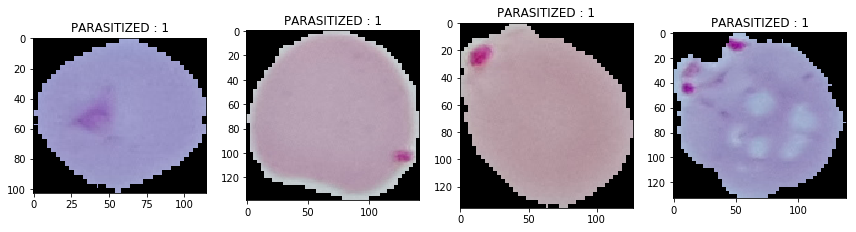

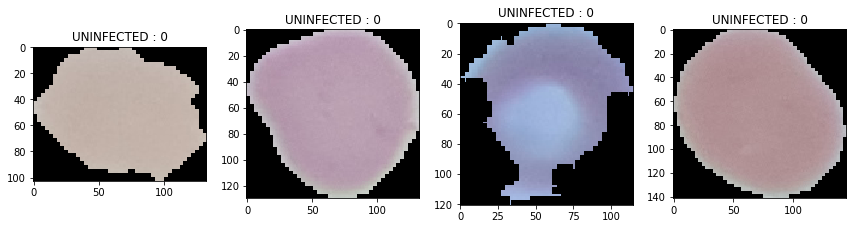

In [8]:
import cv2
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [18]:
from PIL import Image
import numpy as np
data = []
labels = []

for i in parasitized_data:
    try:
    
        image = cv2.imread("/content/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
    except AttributeError:
        print('')
    
for u in uninfected_data:
    try:
        
        image = cv2.imread("/content/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')


In [19]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (96453, 50, 50, 3) | labels : (96453,)


In [0]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [0]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(cells , labels , test_size = 0.2 ,random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , test_size = 0.5 , random_state = 111)

In [22]:
print('train data shape {} ,eval data shape {} , test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))


train data shape (77162, 50, 50, 3) ,eval data shape (9645, 50, 50, 3) , test data shape (9646, 50, 50, 3)


In [23]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(50 , 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [25]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.externals import joblib

train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(train_x, train_y, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(test_x, test_y, batch_size = 64, shuffle = False)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=80,
      validation_data=val_generator,
      validation_steps=50, 
      verbose=1)



Epoch 1/80
100/100 [==============================] - 19s 193ms/step - loss: 0.6832 - acc: 0.5708 - val_loss: 0.6780 - val_acc: 0.5869
Epoch 2/80
100/100 [==============================] - 19s 187ms/step - loss: 0.6838 - acc: 0.5684 - val_loss: 0.6777 - val_acc: 0.5869
Epoch 3/80
100/100 [==============================] - 19s 186ms/step - loss: 0.6781 - acc: 0.5854 - val_loss: 0.6771 - val_acc: 0.5869
Epoch 4/80
100/100 [==============================] - 19s 186ms/step - loss: 0.6829 - acc: 0.5702 - val_loss: 0.6778 - val_acc: 0.5869
Epoch 5/80
100/100 [==============================] - 19s 187ms/step - loss: 0.6811 - acc: 0.5730 - val_loss: 0.6765 - val_acc: 0.5869
Epoch 6/80
100/100 [==============================] - 19s 185ms/step - loss: 0.6827 - acc: 0.5677 - val_loss: 0.6764 - val_acc: 0.5869
Epoch 7/80
100/100 [==============================] - 18s 185ms/step - loss: 0.6805 - acc: 0.5711 - val_loss: 0.6758 - val_acc: 0.5869
Epoch 8/80
100/100 [==============================] - 1

NameError: ignored

In [28]:
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


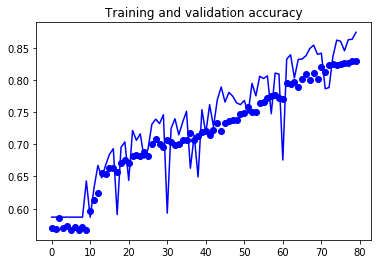

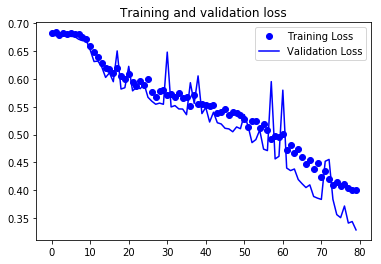

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(50, 50))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

In [32]:
!ls

cell_images	 Cells.npy   Malaria_model.sav	sample_data
cell_images.zip  Labels.npy  model.h5
